In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.37'

In [2]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

## Load in specra, and combine

In [6]:
import os.path
from os import path
if path.exists('Weak_Diads.xlsx'):
    grp1=pd.read_excel('Weak_Diads.xlsx')
else:
    grp1=None
if path.exists('Medium_Diads.xlsx'):
    grp2=pd.read_excel('Medium_Diads.xlsx')
else:
    grp2=None
if path.exists('Strong_Diads.xlsx'):
    grp3=pd.read_excel('Strong_Diads.xlsx')
else:
    grp3=None
df2=pd.concat([grp1, grp2, grp3], axis=0)
df2.head()

,Unnamed: 0,filename,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Residual_Diad1,Diad1_Prop_Lor,...,Diad2_refit,HB1_Cent,HB1_Area,HB1_Sigma,HB2_Cent,HB2_Area,HB2_Sigma,C13_Cent,C13_Area,C13_Sigma
0,0,02 MP2_53_100X_FIA_12mW,103.430561,1285.256501,301.660565,1285.256551,510.014262,0.652366,1.805573,0.554159,...,Flagged Warnings:,1265.016792,64.420138,0.940408,1410.162295,95.596899,0.696126,NaN,NaN,NaN
1,0,05 MP2_53_100X_FIB_12mW,103.442881,1285.186042,444.855640,1285.186092,781.472858,0.661179,2.464987,0.616914,...,Flagged Warnings:,1264.932792,95.260461,1.048742,1409.942284,141.414992,0.890872,NaN,NaN,NaN
2,0,06 MP2_53_100X_FID_12mW,103.377865,1285.333624,399.369704,1285.333674,654.289214,0.615021,2.800588,0.623262,...,Flagged Warnings:,1265.152026,85.013213,0.791172,1409.985155,118.170327,0.672248,NaN,NaN,NaN
3,0,08 MP2_53_100X_FIC_12mW,103.472572,1285.041279,358.048742,1285.041329,716.170455,0.731686,2.573892,0.686981,...,Flagged Warnings:,1264.705682,106.221532,1.227426,1409.932337,101.331930,0.818447,NaN,NaN,NaN
4,0,10 MP2_55_100X_FIA_12mW,103.405247,1285.193592,43.011509,1285.193592,66.982492,0.713380,2.500062,0.093551,...,Flagged Warnings:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## First, get the metadata for this day

In [11]:
# Put the common string you can in all your Ne lines here
ID_str='_'
file_ext_meta='txt' # Will only take files of this type 
diad_meta=pf.get_diad_files(path=meta_path,
file_ext='txt', exclude_str='N', 
            exclude_str_2='FG', 
            exclude_str_3='Cap',
                            exclude_str_4='window',
            exclude_type='.png',   sort=True)
diad_meta

['01 MP2_53_50X_FIA.txt',
 '03 MP2_53_100X_FIA_12mW.txt',
 '04 MP2_53_100X_FIA.txt',
 '07 MP2_53_100X_FIB.txt',
 '08 MP2_53_100X_FIB_12mW.txt',
 '09 MP2_53_100X_FID.txt',
 '10 MP2_53_100X_FID_12mW.txt',
 '11 MP2_53_100X_FIC.txt',
 '13 MP2_53_100X_FIC_12mW.txt',
 '14 MP2_54_20X_FIA.txt',
 '15 MP2_54_100X_FIA.txt',
 '17 MP2_55_100X_FIA.txt',
 '18 MP2_55_100X_FIA_12mW.txt',
 '19 MP2_55_50X_FIA.txt',
 '20 MP2_56_20X_FIA.txt',
 '21 MP2_56_FIA_12mW.txt',
 '23 MP2_56_50X_FIA.txt',
 '24 MP2_57_50X_FIA.txt',
 '25 MP2_57_50X_FIA_nodiad.txt',
 '26 MP2_57_20X_FIB.txt',
 '27 MP2_57_100X_FIB_12mW.txt',
 '28 MP2_57_100X_FIB_8mW.txt',
 '29 MP2_57_100X_FIB.txt',
 '31 MP2_57_100X_FIC_nodiad.txt',
 '32 MP2_57_100X_FIE.txt',
 '33 MP2_57_100X_FIE_8mW.txt',
 '34 MP2_57_50X_FID.txt',
 '36 MP2_57_50X_FID_12mW.txt',
 '37 MP2_58_FIA_20X.txt',
 '38 MP2_58_FIA_5X.txt',
 '39 MP2_58_FIA_100X.txt',
 '40 MP2_58_FIA_12mW_Brightfieldoops.txt',
 '41 MP2_59_FIA_5X.txt',
 '42 MP2_59_FIA_50X.txt',
 '44 MP2_59_nodiad.txt',


## Now get all the important information out of the metadata files

In [12]:
meta=pf.stitch_metadata_in_loop(path=meta_path, 
Allfiles=diad_meta, prefix=False,
trupower=False)
meta['filename'].iloc[0]

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:01<00:00, 35.97it/s]

Done


'03 MP2_53_100X_FIA_12mW.txt'

## Then get a simple file name you can stitch with the spectra

In [19]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=True, str_prefix=" ",
   file_type='.txt')
# Checks they are all unique
file_m[0]

'MP2_53_100X_FIA_12mW'

## Now get filename from spectra into same form as metadata

In [20]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    prefix=True, str_prefix=" ",
    names=df2['filename'].reset_index(drop=True),
   file_type='.txt')

file_s

array(['MP2_53_100X_FIA_12mW', 'MP2_53_100X_FIB_12mW',
       'MP2_53_100X_FID_12mW', 'MP2_53_100X_FIC_12mW',
       'MP2_55_100X_FIA_12mW', 'MP2_56_FIA_12mW', 'MP2_57_100X_FIB_12mW',
       'MP2_57_100X_FIB_8mW', 'MP2_57_100X_FIE_8mW',
       'MP2_57_50X_FID_12mW', 'MP2_58_FIA_12mW', 'MP2_60_FIA_12mW',
       'MP2_60_FIA_8mW', 'MP2_60_FIB_100X_8mW', 'MP2_60_FIF_100X_8mW',
       'MP2_60_FIG_100X_8mW', 'MP2_60_FIH_8mW'], dtype=object)

In [21]:
# Combining them together
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

In [22]:
from pickle import load
import pickle
import os
pickle_path=os.getcwd()
file_pkl=pickle_path + '/' + 'Ne_Line_Regression_Example_cali.pck'
with open(file_pkl, 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

In [23]:
df_combo['Ne_Correction']=my_loaded_model(df_combo['sec since midnight'])
df_combo.insert(1,'Corrected_Splitting', df_combo['Ne_Correction']*df_combo['Splitting'])

In [24]:
df_combo

,Unnamed: 0,Corrected_Splitting,filename_x,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Residual_Diad1,...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
0,0,103.185766,02 MP2_53_100X_FIA_12mW,103.430561,1285.256501,301.660565,1285.256551,510.014262,0.652366,1.805573,...,30.0,NaN,45.0,3.0,100.0,"['0h', '2m', '16s']",3:08:07 PM\n,54487.0,1325.004,0.997633
1,0,103.197427,05 MP2_53_100X_FIB_12mW,103.442881,1285.186042,444.855640,1285.186092,781.472858,0.661179,2.464987,...,30.0,NaN,45.0,3.0,100.0,"['0h', '2m', '16s']",3:39:23 PM\n,56363.0,1325.004,0.997627
2,0,103.132475,06 MP2_53_100X_FID_12mW,103.377865,1285.333624,399.369704,1285.333674,654.289214,0.615021,2.800588,...,30.0,NaN,45.0,3.0,100.0,"['0h', '2m', '16s']",3:44:03 PM\n,56643.0,1325.004,0.997626
3,0,103.226790,08 MP2_53_100X_FIC_12mW,103.472572,1285.041279,358.048742,1285.041329,716.170455,0.731686,2.573892,...,30.0,NaN,45.0,3.0,100.0,"['0h', '2m', '16s']",3:52:46 PM\n,57166.0,1325.004,0.997625
4,0,103.159060,10 MP2_55_100X_FIA_12mW,103.405247,1285.193592,43.011509,1285.193592,66.982492,0.713380,2.500062,...,30.0,NaN,45.0,3.0,100.0,"['0h', '2m', '16s']",4:23:15 PM\n,58995.0,1325.004,0.997619
5,0,103.038210,11 MP2_56_FIA_12mW,103.284259,1285.532811,644.280116,1285.532811,999.001852,0.578358,9.284297,...,30.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",4:31:39 PM\n,59499.0,1325.004,0.997618
6,0,103.088762,14 MP2_57_100X_FIB_12mW,103.335284,1285.389843,423.554435,1285.389893,772.977326,0.719790,3.156737,...,30.0,NaN,45.0,3.0,100.0,"['0h', '2m', '16s']",4:51:59 PM\n,60719.0,1325.004,0.997614
7,0,103.056305,15 MP2_57_100X_FIB_8mW,103.302803,1285.435870,239.128750,1285.435920,441.212935,0.631709,2.892442,...,30.0,NaN,45.0,3.0,100.0,"['0h', '2m', '16s']",4:55:14 PM\n,60914.0,1325.004,0.997614
8,0,103.195492,18 MP2_57_100X_FIE_8mW,103.442596,1285.161058,282.390261,1285.161058,555.596612,0.790616,2.635657,...,30.0,NaN,45.0,3.0,100.0,"['0h', '2m', '16s']",5:11:43 PM\n,61903.0,1325.004,0.997611
9,0,103.257895,20 MP2_57_50X_FID_12mW,103.505343,1284.962651,115.811000,1284.962651,219.226422,0.725839,1.819529,...,30.0,NaN,45.0,3.0,100.0,"['0h', '2m', '16s']",5:23:50 PM\n,62630.0,1325.004,0.997609


In [26]:
Density=pf.calculate_density_cornell(temp='SupCrit', Split=df_combo['Corrected_Splitting'])
df_combo.insert(0,'Density', Density['Preferred D'])

In [27]:
depth=pf.convert_co2_density_depth_Coolprop(T_K=1150+273.15,
    CO2_dens_gcm3=df_combo['Density'],
    crust_dens_kgm3='ryan_lerner', output='df',
    g=9.81)
depth

,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,input_T_K,input_CO2_dens_gcm3
0,0.540890,54.089049,2.402024,ryan_lerner,1423.15,0.177603
1,0.557251,55.725150,2.471355,ryan_lerner,1423.15,0.182298
2,0.463981,46.398084,2.073650,ryan_lerner,1423.15,0.155034
3,0.599315,59.931451,2.648771,ryan_lerner,1423.15,0.194201
4,0.497702,49.770184,2.218130,ryan_lerner,1423.15,0.165031
5,0.348588,34.858840,1.573132,ryan_lerner,1423.15,0.119587
6,0.409685,40.968506,1.839332,ryan_lerner,1423.15,0.138597
7,0.370254,37.025437,1.667842,ryan_lerner,1423.15,0.126391
8,0.554523,55.452314,2.459806,ryan_lerner,1423.15,0.181517
9,0.645271,64.527145,2.841265,ryan_lerner,1423.15,0.206934


(array([2., 1., 0., 1., 1., 0., 3., 2., 4., 3.]),
 array([1.573132  , 1.70718097, 1.84122994, 1.97527891, 2.10932788,
        2.24337685, 2.37742583, 2.5114748 , 2.64552377, 2.77957274,
        2.91362171]),
 <BarContainer object of 10 artists>)

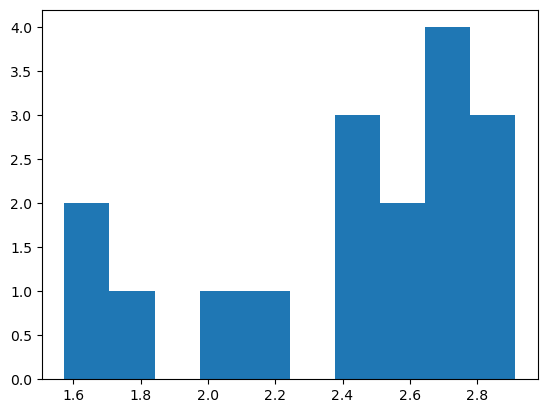

In [28]:
plt.hist(depth['Depth (km)'])